# Flipkart mobile analysis

## Importing libraries

In [1]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO

## Defining path of csv

In [2]:
path = r'C:\Users\Amar\Downloads\archive (1)\Flipkart_mobile_data.csv'

## Creating dataframe

In [3]:
df = pd.read_csv(path)

## Drop the Unnamed: 0 column

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

## Removing ₹ and , from Price column

In [5]:
df = df.replace(to_replace ='₹', value = '', regex = True)

In [6]:
df = df.replace(to_replace =',', value = '', regex = True)

## Changing Price datatype

In [7]:
df['Price'] = df['Price'].astype(float)

## Handling null values

In [8]:
df = df.drop(df[df['Price'].isna()].index, axis = 0)

In [9]:
df.isnull().sum()

Image            0
Phone Name       0
Price            0
Specification    0
Rating           0
dtype: int64

## Deleting duplicate data

In [10]:
df = df.drop(df[df.duplicated()].index)

## Variety of phones on flipkart

In [11]:
len(df['Phone Name'].unique())

803

##  Top 10 most expensive phones on flipkart

In [12]:
df[['Phone Name','Price']].sort_values(by = 'Price',ascending = False).head(10)

,Phone Name,Price
940,APPLE iPhone 14 Pro Max (Space Black 128 GB),127999.0
637,APPLE iPhone 14 Pro Max (Deep Purple 128 GB),127999.0
819,APPLE iPhone 14 Pro (Space Black 128 GB),117999.0
823,SAMSUNG Galaxy S23 Plus 5G (Cream 512 GB),104999.0
786,SAMSUNG Galaxy S23 Plus 5G (Cream 256 GB),94999.0
910,SAMSUNG Galaxy Z Flip4 5G (Graphite 128 GB),89999.0
653,vivo X90 Pro (Legendary Black 256 GB),84999.0
647,APPLE iPhone 14 Plus (Starlight 256 GB),83999.0
753,APPLE iPhone 14 (Starlight 256 GB),78999.0
765,APPLE iPhone 14 (Blue 256 GB),78999.0


##  Top 10 cheapest phones on flipkart

In [13]:
df[['Phone Name','Price']].sort_values(by = 'Price',ascending = True).head(10)

,Phone Name,Price
652,LYF C459 (Blue 8 GB),3299.0
335,Micromax Bharat 2 Plus (Champagne 8 GB),3599.0
727,itel A23S (Ocean Blue 32 GB),4699.0
390,itel A23S (Sky Cyan 32 GB),4699.0
191,itel A23S (Sky Black 32 GB),4699.0
579,itel A25 (Gradation Green 16 GB),4890.0
642,itel A25 (Gradation Blue 16 GB),4924.0
728,itel A25 (Gradation Sea Blue 16 GB),4999.0
882,XOLO ERA 1X -4G with VoLTE (Gold Chocolate Bro...,5149.0
885,XOLO ERA 1X -4G with VoLTE (Black and Gun Meta...,5149.0


## Most expensive phone on flipkart with picture

In [14]:
most_exp = df[['Image','Price','Phone Name']][df['Price'] == max(df['Price'])]

In [15]:
url_exp = most_exp.iloc[-1,0]

In [16]:
response = requests.get(url_exp)
img_exp = Image.open(BytesIO(response.content))

Phone Name: APPLE iPhone 14 Pro Max (Deep Purple 128 GB) 
 Price of phone = ₹ 127999.0


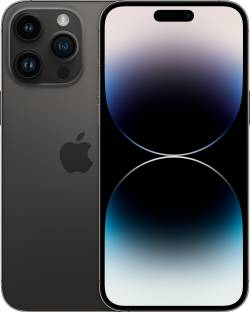

(None, None)

In [17]:
print('Phone Name:', most_exp.iloc[0,2] ,'\n','Price of phone =' , '₹' , most_exp.iloc[0,1]), display(img_exp) 

## Cheapest phone on flipkart with pitcure

In [18]:
cheap = df[['Image','Price','Phone Name']][df['Price'] == min(df['Price'])]

In [19]:
url_cheap = cheap.iloc[-1,0]

In [20]:
response = requests.get(url_cheap)
img_cheap = Image.open(BytesIO(response.content))

Phone Name: LYF C459 (Blue 8 GB) 
 Price of phone = ₹ 3299.0


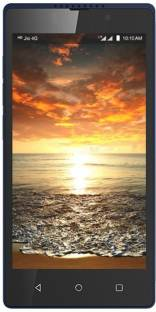

(None, None)

In [21]:
print('Phone Name:', cheap.iloc[0,2]  ,'\n','Price of phone =','₹',cheap.iloc[0,1]) , display(img_cheap)

## Top 10 Phones with highest ratings

In [22]:
df[['Phone Name','Price','Rating']][df['Rating'] == max(df['Rating'])].head(10)

,Phone Name,Price,Rating
101,APPLE iPhone 13 (Midnight 128 GB),58499.0,4.7
107,APPLE iPhone 13 (Blue 128 GB),58499.0,4.7
121,APPLE iPhone 13 (Pink 128 GB),58499.0,4.7
126,APPLE iPhone 13 (Starlight 128 GB),58499.0,4.7
184,APPLE iPhone 13 (Green 128 GB),58499.0,4.7
350,APPLE iPhone 14 Plus (Starlight 128 GB),73999.0,4.7
356,APPLE iPhone 14 Plus (Purple 128 GB),73999.0,4.7
401,APPLE iPhone 14 Plus (Midnight 128 GB),73999.0,4.7
461,APPLE iPhone 14 Plus (Blue 128 GB),73999.0,4.7
637,APPLE iPhone 14 Pro Max (Deep Purple 128 GB),127999.0,4.7


## Phones with lowest ratings

In [23]:
df[['Phone Name','Price','Rating']][df['Rating'] == min(df['Rating'])].head(10)

,Phone Name,Price,Rating
652,LYF C459 (Blue 8 GB),3299.0,3.1
933,I Kall Z3 (Aquamarine 64 GB),6289.0,3.1


## Best 10 phones under ₹20,000

In [24]:
u_20k = df[['Phone Name','Price','Rating']][df['Price'] <= 20000].sort_values(by = 'Price', ascending = False)

In [25]:
u_20k[u_20k[['Phone Name','Price','Rating']]['Rating'] == max(u_20k['Rating'])].head(10)

,Phone Name,Price,Rating
833,realme XT (Pearl Blue 128 GB),19960.0,4.5
397,POCO X2 (Atlantis Blue 64 GB),17999.0,4.5
781,POCO X2 (Phoenix Red 64 GB),17999.0,4.5
877,Redmi Note 6 Pro (Blue 64 GB),17999.0,4.5
724,Redmi Note 6 Pro (Red 64 GB),17999.0,4.5
723,Redmi Note 6 Pro (Rose Gold 64 GB),17999.0,4.5
699,POCO X2 (Matrix Purple 64 GB),17999.0,4.5
958,Redmi K20 (Flame Red 64 GB),17990.0,4.5
799,Redmi Note 5 Pro (Gold 64 GB),16999.0,4.5
714,vivo T1X (Space Blue 64 GB),16990.0,4.5


## Samsung Vs Apple (Flagship phones)

In [26]:
sam = df[df['Phone Name'].str.contains('SAMSUNG')]
sam_img = sam[['Image','Phone Name']][sam[['Image','Price']]['Price'] == max(sam['Price'])].head(1)
sam_name = sam_img.iloc[0,1]
sam_img = sam_img.iloc[-1,0]

In [27]:
apple = df[df['Phone Name'].str.contains('APPLE')]
apple_img = apple[['Image','Phone Name']][apple[['Image','Price']]['Price'] == max(apple['Price'])]
apple_name = apple_img.iloc[0,1]
apple_img = apple_img.iloc[-1,0]

In [28]:
response = requests.get(sam_img)
sam_img = Image.open(BytesIO(response.content))

response = requests.get(apple_img)
apple_img = Image.open(BytesIO(response.content))

SAMSUNG Galaxy S23 Plus 5G (Cream 512 GB)


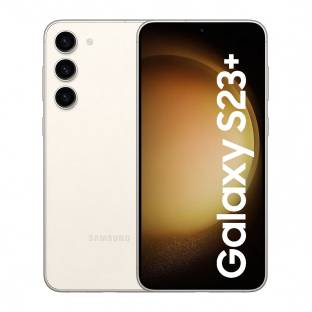





 APPLE iPhone 14 Pro Max (Deep Purple 128 GB) 



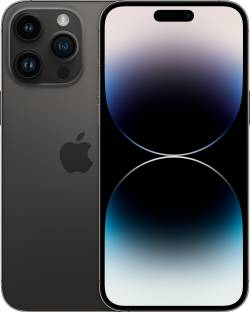

In [29]:
print(sam_name)
display(sam_img)
print('\n'*4,apple_name,'\n')
display(apple_img)